## Zomato task

dataset link [here](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/kernels)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data loading

In [2]:
data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### Some stats

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

#### Note:-
- This says we have missing values in **rate,phone,dish_liked,cuisines,approx_cost**
- **votes** is int, so you can get stats only for this column as of now.
- remaining all object type

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Note**:-
- This shows the **list of total columns** in the given dataset.

In [7]:
data.shape

(51717, 17)

**Note:**-
- it has 51717 rows and 17 columns

In [8]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


**Note**:-
- as min value is 0, this means that **we have restaurent with no votes**.
- we have a **restaurent with highest votes** count is 16832.

In [9]:
import pandas_profiling as pp
pp.ProfileReport(data)

### Missing values

In [10]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for_two_people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**Note**:-
- We have missing values in our dataset.

In [11]:
#taking rows with not null values in cuisine
data=data[data.cuisines.isna()==False]

In [12]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for_two_people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

- lets drop the columns **"url", 'address','phone','listed_in(city)'** are not useful.

In [13]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

In [14]:
#renaming approx_cost column
data.rename(columns= {"approx_cost(for_two_people)":'average_cost'},inplace= True)

zomato.rename(columns  ={'approx_cost(for two people)': 'average_cost','listed_in(city)': 'zomato_location','listed_in(type)': 'meal_type'},inplace = True)


### Preprocessing and visualizations

### name

In [15]:
data.name.value_counts().head()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

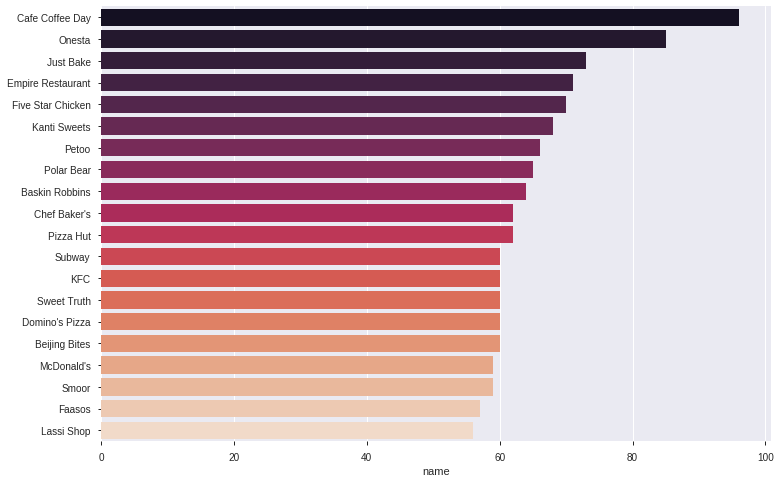

In [16]:
plt.figure(figsize = (12,8))
hotels = data.name.value_counts()[:20]
sns.barplot(hotels,hotels.index,palette="rocket")

#### Note:-
**Cafe Coffee Day** has more number of Restaurents in Bangalore.

#### Online orders

**Q]Are reastaurents accepting online orders, if yes, how many?**

In [17]:
data.online_order.value_counts()

Yes    30428
No     21244
Name: online_order, dtype: int64

Text(0.5, 1.0, 'Online Order')

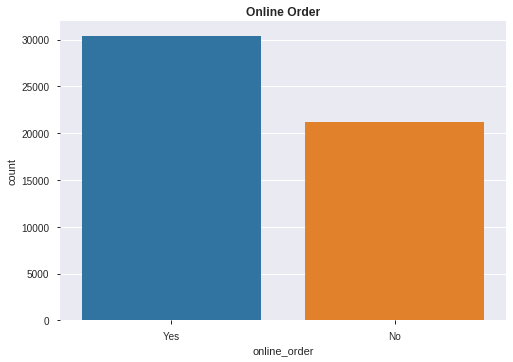

In [18]:
ax= sns.countplot(data['online_order'])
plt.title('Online Order', weight='bold')

**Note**:-
- Online order has no null values.
- Most of the orders are online i.e 30444

#### Book tables

In [19]:
data['book_table'].value_counts()

No     45223
Yes     6449
Name: book_table, dtype: int64

Text(0.5, 1.0, 'Book Table')

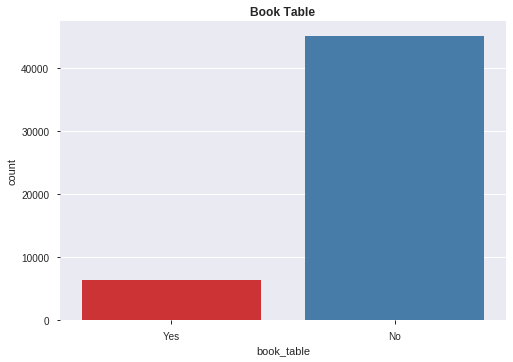

In [20]:
sns.countplot(data['book_table'], palette= "Set1")
plt.title("Book Table", weight = 'bold')

- this column has no missing values
- 45268 restaurents have **No** book table feature.

#### Location

In [21]:
data['location'].value_counts()[:10]

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Indiranagar              2081
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1630
Bellandur                1286
Name: location, dtype: int64

Text(0.5, 1.0, 'Location')

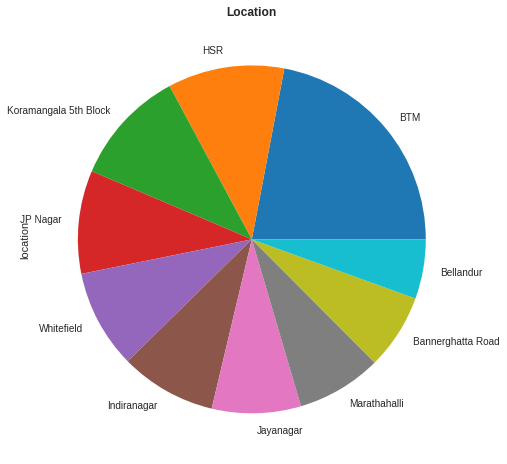

In [22]:
plt.figure(figsize=(12,8)) 
data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

Text(0.5, 1.0, 'Location vs Count')

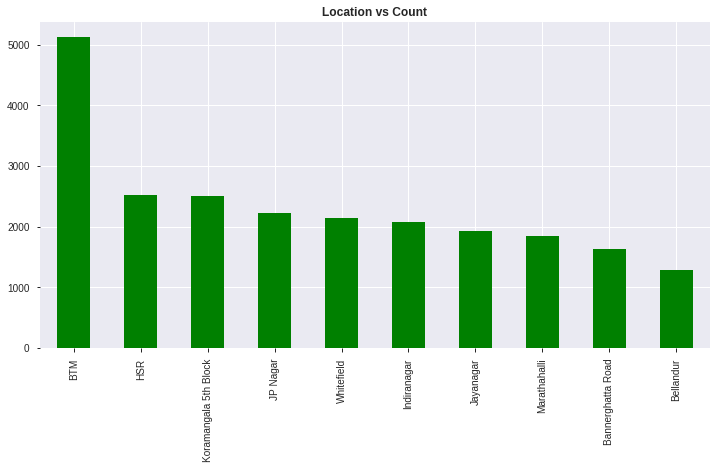

In [23]:
plt.figure(figsize = (12,6))
data['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [24]:
data['location'].nunique()

93

**Note**:-
- So we have 88 **Neighbourhoods** in Bangalore.
- We have **highest no of restaurents** in **BTM**.
- **least** is in **Bellandur**.

#### Resttype

In [25]:
data['rest_type'].value_counts().head(10)

Quick Bites           19129
Casual Dining         10326
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           865
Bar                     697
Name: rest_type, dtype: int64

Text(0.5, 1.0, 'Restaurent Type')

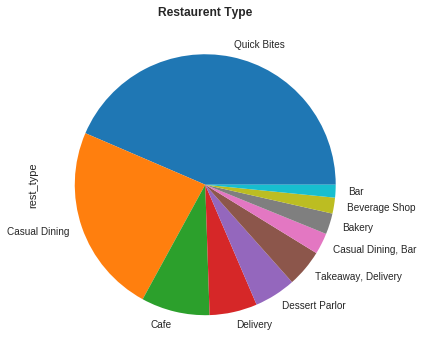

In [26]:
plt.figure(figsize = (12,6))
data.rest_type.value_counts()[:10].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')

**Note**:-
- we have **more no of restaurents in Qucikbites** section
- with **Casual Dining** in **second place**.

#### cuisines

In [27]:
data['cuisines'].value_counts().head()

North Indian             2913
North Indian, Chinese    2385
South Indian             1828
Biryani                   918
Bakery, Desserts          911
Name: cuisines, dtype: int64

Text(0.5, 1.0, 'Cuisines vs count')

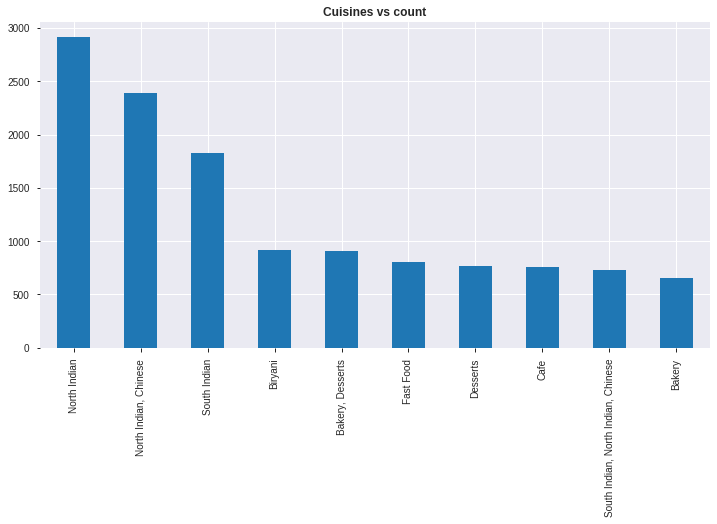

In [28]:
plt.figure(figsize = (12,6))
data['cuisines'].value_counts()[:10].plot(kind = 'bar')
plt.title('Cuisines vs count', weight = 'bold')

**Note**:-
- most lilked cuisines in bangalore is **Northindian**.

# approxcost

In [29]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes


In [30]:
data['average_cost'].value_counts()[:5]

300    7576
400    6554
500    4977
200    4855
600    3712
Name: average_cost, dtype: int64

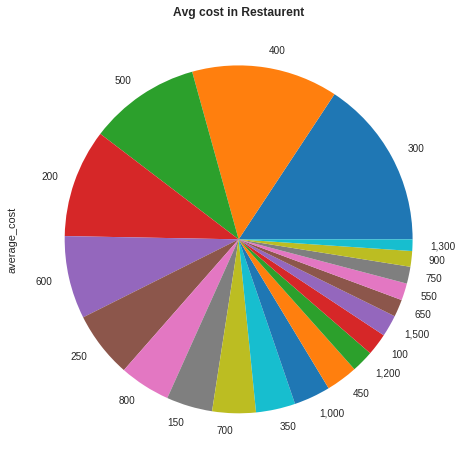

In [31]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent', weight = 'bold')
plt.show()

**Note**:- Most of the restaurent in bangalore are in Average cost of **300**.

### dish liked

In [32]:
#lets delete the nulll values
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [33]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                30
votes                0
location             0
rest_type           70
dish_liked           0
cuisines             0
average_cost       136
reviews_list         0
menu_item            0
listed_in(type)      0
dtype: int64

In [34]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

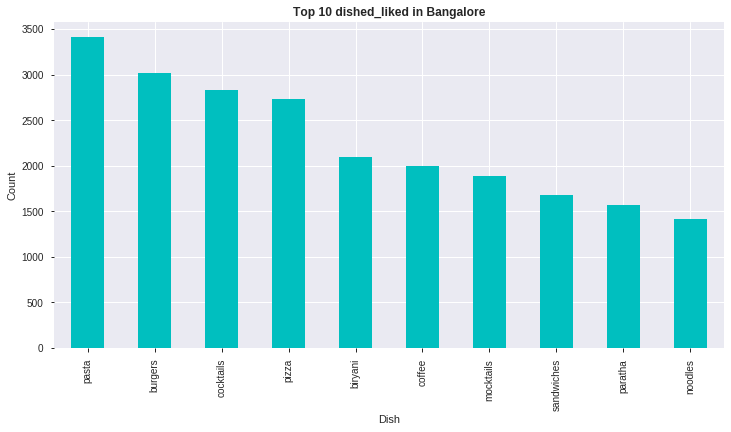

In [35]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

#### NOte:-
- **pasta** is the **most liked dish**.
- **salads** are **least liked**.

### Rate

In [36]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [37]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

3.9058343007008034


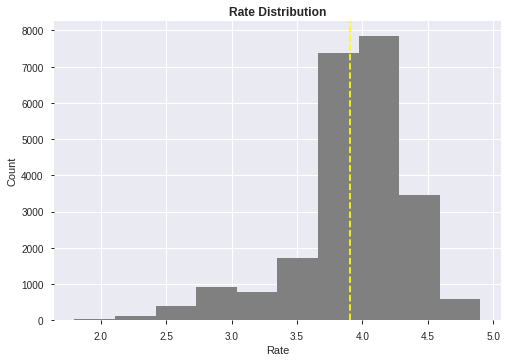

In [38]:
data.rate.hist(color='grey')
plt.axvline(x= data.rate.mean(),ls='--',color='yellow')
plt.title('Rate Distribution',weight='bold')
plt.xlabel('Rate')
plt.ylabel('Count')
print(data.rate.mean())

from here we can see that The Avg rating for All Bangalore restaurents is **3.9**.

#### resttype vs rate

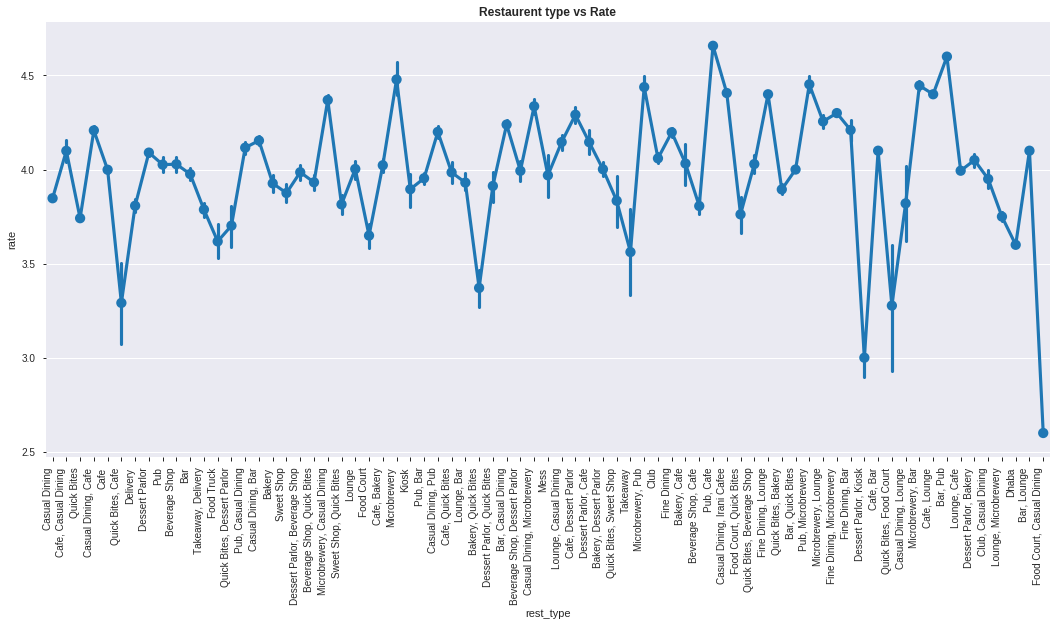

In [39]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

#### Cuisines

In [40]:
#lets delete the nulll values
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [41]:
cuisines_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",north indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","pizza, cafe, italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","cafe, italian, continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","cafe, mexican, italian, momos, beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes


In [42]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'Count')

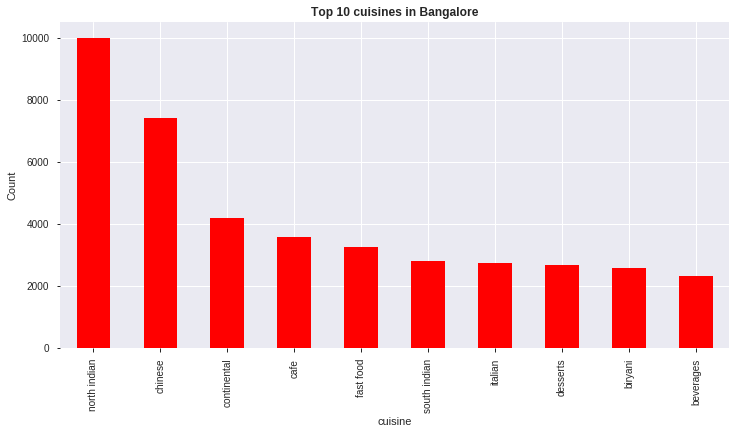

In [43]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisine')
plt.ylabel('Count')

### Rate vs online order

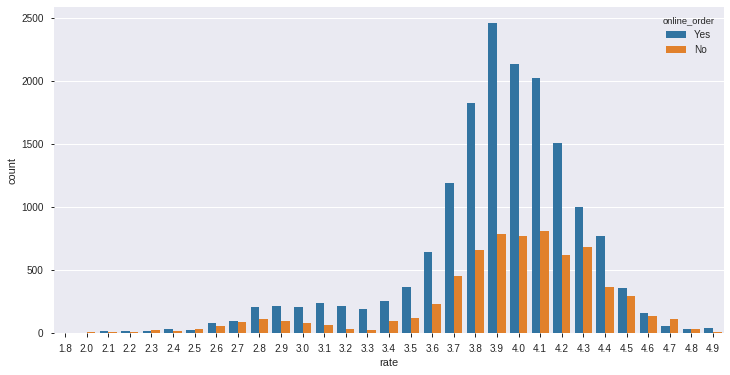

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])

- so online order has **effect on rating**.

# Final obseravations:

- 30428 accepting online orders**
- 45268 restaurents have No book table feature**.
#### Restaurents:-
- So we have 88 Neighbourhoods in Bangalore.
- We have highest no of restaurents in BTM.
- least is in Bellandur.
#### Restaurent types:-
- we have more no of restaurents in Qucikbites section.
- with Casual Dining in second place.
#### cuisine:-
- most lilked is Northindian.
#### Average cost of Restaurent:
- 7576 has average cost of 300 rupees for 2people.
#### Dish liked:
- Pasta is the most liked Dish.


### Preprocess for model building.

In [45]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
5,Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet
7,Onesta,1,1,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes
8,Penthouse Cafe,1,0,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes
9,Smacznego,1,0,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,0,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes


In [46]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [47]:
# remove redundant rows for encoding
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [48]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

### Label encoder

data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data['location']= pd.get_dummies(data.location, drop_first=True)
data['rest_type']= pd.get_dummies(data.rest_type, drop_first=True)
data['cuisines']= pd.get_dummies(data.cuisines, drop_first=True)

data['online_order'].unique()

In [49]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [50]:
data["average_cost"] = data["average_cost"].str.replace(',' , '') 

In [51]:
data["average_cost"] = data["average_cost"].astype('float')


In [52]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0


### one hot encoding

In [53]:
print hi

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(hi)? (<ipython-input-53-d802f0d583cc>, line 1)

In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=True)
#array.reshape(-1, 1)
#data['location'] = np.array(location).reshape((len(location), 1))
data['location'] = data['location'].values.reshape(1,-1)
#data['location'] = enc.fit_transform(data['location'])
data['rest_type'] = enc.fit_transform(data['rest_type'])
data['cuisines'] = enc.fit_transform(data['cuisines'])

ValueError: Length of values does not match length of index

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=True)
#array.reshape(-1, 1)
#temp = np.array(temp).reshape((len(temp), 1))
data['location'] = enc.fit_transform(data['location'].reshape(-1,1))
data['rest_type'] = enc.fit_transform(data['rest_type'].reshape(-1,1))
data['cuisines'] = enc.fit_transform(data['cuisines'].reshape(-1,1))

In [ ]:
print hi

### split

In [ ]:
x = data.drop(['rate','name'],axis = 1)

In [ ]:
y = data['rate']

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

#### Standardising

In [ ]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

In [ ]:
data.head()

#### LinearRegresssion

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)*100

#### Random forest

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

#### Ridge

In [ ]:
####RIDGE
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [ ]:
rdg.score(X_test,y_test)*100

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
ls.score(X_test,y_test)*100

#### Out of all four models, random forest is giving more accuracy

Done

### Regularization

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
MSEs = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)

print(mean_MSE)

#lr.fit(X_train,y_train)
#y_pred_lr = lr.predict(X_test)

### ridge

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

In [ ]:
ridge_regressor.best_score_

### Laso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

In [ ]:

lasso_regressor.best_score_